In [1]:
import seaborn as sns

import matplotlib.pyplot as plt 
plt.rcParams.update({
    'font.size': 20,
    'figure.figsize': (12, 6)
})

# Set the font family to Arial
# https://g.co/gemini/share/3898a74b2d77
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial'] # Add Arial to the sans-serif list

In [2]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-labs/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

## Non-exonic Chen windows, with Gnocchi, and various features (e.g. GC content), and enhancer-overlap status 

In [3]:
import polars as pl

def get_chen_windows(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.features.constraint_scores.bed',
        separator='\t',
    )
    df = df.to_pandas()
    return df 
    
CHEN_WINDOWS = get_chen_windows()
CHEN_WINDOWS

,chrom,start,end,gnocchi,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,...,lambda_M3starHMT6.EUR,GC_content_1000bp,GC_content_10000bp,GC_content_100000bp,GC_content_1000000bp,cpg_island_overlap,window_overlaps_cpg_island,N_mean_null_gnocchi,depletion_rank_constraint_score,depletion_rank_constraint_score_complement
0,chr1,1432000,1433000,4.299894,259,True,False,0.653,0.039046,0.025852,...,2.585568,0.661339,0.641836,0.565094,0.577534,NaN,False,338.059552,0.776961,0.223039
1,chr1,1451000,1452000,0.666316,291,False,False,0.652,0.039046,0.025852,...,2.585568,0.556444,0.552845,0.572894,0.575506,NaN,False,302.590657,0.679834,0.320166
2,chr1,1453000,1454000,0.828398,256,False,False,0.651,0.039046,0.025852,...,2.585568,0.537463,0.561944,0.572564,0.575129,NaN,False,269.601925,0.320987,0.679013
3,chr1,1458000,1459000,-0.086128,272,False,False,0.651,0.039046,0.025852,...,2.585568,0.532468,0.596740,0.570774,0.575225,NaN,False,270.583243,0.718503,0.281497
4,chr1,1463000,1464000,2.948188,191,True,False,0.651,0.039046,0.025852,...,2.585568,0.540460,0.568843,0.576514,0.574420,NaN,False,236.321790,0.170495,0.829505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003222,chr9,137262000,137263000,-2.396149,302,True,False,0.536,0.057053,0.063434,...,2.281162,0.500499,0.542646,0.611944,0.568316,45.0,True,263.131293,0.968399,0.031601
1003223,chr9,137268000,137269000,3.640544,212,True,False,0.536,0.057053,0.063434,...,2.281162,0.552448,0.589941,0.613074,0.567839,NaN,False,272.046527,0.401000,0.599000
1003224,chr9,137269000,137270000,5.276351,209,True,False,0.536,0.057053,0.063434,...,2.281162,0.519481,0.585042,0.613494,0.567623,NaN,False,300.458958,0.282586,0.717414
1003225,chr9,137275000,137276000,2.687348,290,True,False,0.536,1.564889,0.024254,...,2.281162,0.603397,0.639236,0.610484,0.567380,NaN,False,339.517045,0.203953,0.796047


## Non-exonic Chen windows, with lambda_s (Dukler et al), and various features (e.g. GC content), and enhancer-overlap status 

In [4]:
def get_chen_windows_with_lambda_s(): 
    # https://mail.google.com/mail/u/0/#inbox/QgrcJHrjCsBTxVdFdTZvkMTlDfGKRnDvZxl
    # http://compgen.cshl.edu/extrainsight/description.php
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/lambda_s/Results_26July2024.csv',
        infer_schema_length=1000000,
    )
    df = df.with_columns(
        df["start"].cast(pl.Int64),
        df["end"].cast(pl.Int64),
    )
    df = df.to_pandas()

    # Nurdan: "I've included the windows for which ExtRaINSIGHT does not report results, 
    # as they do not pass the filtering steps. 
    # In these cases, all values from columns 4 to 9 are 0."
    df = df[df['num_possible_mutations'] > 0]

    df = CHEN_WINDOWS.merge(df, left_on=['chrom', 'start', 'end'], right_on=['chr', 'start', 'end'], how='inner')
    df = df.drop(columns=['chr'])

    return df 
    
CHEN_WINDOWS_WITH_LAMBDA_S = get_chen_windows_with_lambda_s()
CHEN_WINDOWS_WITH_LAMBDA_S

,chrom,start,end,gnocchi,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,...,window_overlaps_cpg_island,N_mean_null_gnocchi,depletion_rank_constraint_score,depletion_rank_constraint_score_complement,strong_selection,p,lr_stat,num_possible_mutations,curvature,se
0,chr1,1432000,1433000,4.299894,259,True,False,0.653,0.039046,0.025852,...,False,338.059552,0.776961,0.223039,0.087061,0.209203,1.576932,2814,399.727327,0.050017
1,chr1,1451000,1452000,0.666316,291,False,False,0.652,0.039046,0.025852,...,False,302.590657,0.679834,0.320166,0.061982,0.374389,0.789047,2784,393.356816,0.050420
2,chr1,1453000,1454000,0.828398,256,False,False,0.651,0.039046,0.025852,...,False,269.601925,0.320987,0.679013,0.103610,0.126727,2.332151,2838,418.212534,0.048899
3,chr1,1458000,1459000,-0.086128,272,False,False,0.651,0.039046,0.025852,...,False,270.583243,0.718503,0.281497,-0.019612,0.779494,0.078388,2826,386.265976,0.050881
4,chr1,1463000,1464000,2.948188,191,True,False,0.651,0.039046,0.025852,...,False,236.321790,0.170495,0.829505,0.255973,0.000075,15.679694,2934,479.295546,0.045677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932817,chr9,137262000,137263000,-2.396149,302,True,False,0.536,0.057053,0.063434,...,True,263.131293,0.968399,0.031601,-0.299242,0.000061,16.073375,2832,335.767008,0.054573
932818,chr9,137268000,137269000,3.640544,212,True,False,0.536,0.057053,0.063434,...,False,272.046527,0.401000,0.599000,0.142611,0.042224,4.126209,2889,395.032594,0.050313
932819,chr9,137269000,137270000,5.276351,209,True,False,0.536,0.057053,0.063434,...,False,300.458958,0.282586,0.717414,0.244719,0.000585,11.821591,2793,394.716252,0.050334
932820,chr9,137275000,137276000,2.687348,290,True,False,0.536,1.564889,0.024254,...,False,339.517045,0.203953,0.796047,-0.003339,0.962861,0.002168,2772,362.114114,0.052551


In [5]:
CHEN_WINDOWS_WITH_LAMBDA_S['window overlaps enhancer'].value_counts()

window overlaps enhancer
False    647113
True     285709
Name: count, dtype: int64

(-0.5, 0.5)

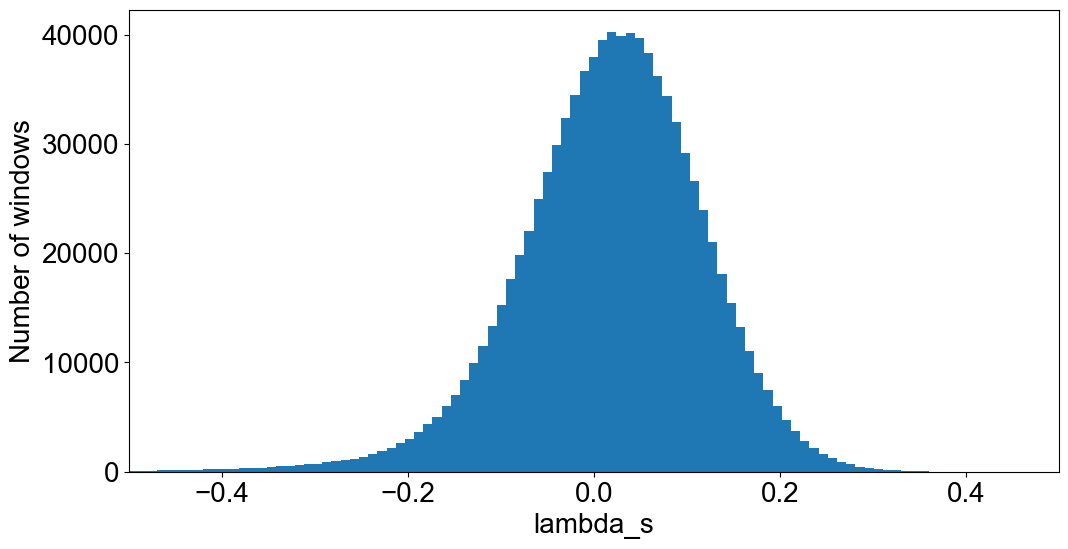

In [6]:
plt.hist(CHEN_WINDOWS_WITH_LAMBDA_S['strong_selection'], bins=200)
# http://compgen.cshl.edu/extrainsight/description.php
plt.xlabel('lambda_s') 
plt.ylabel('Number of windows')
plt.grid(False)
plt.xlim(-0.5, 0.5)

Text(0, 0.5, 'Number of windows')

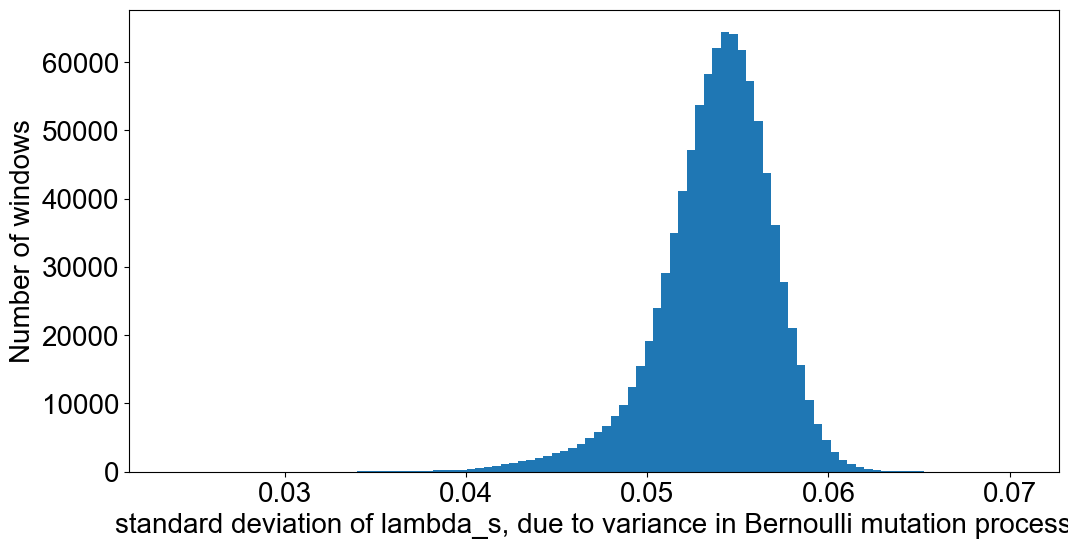

In [7]:
plt.hist(CHEN_WINDOWS_WITH_LAMBDA_S['se'], bins=100)
# http://compgen.cshl.edu/extrainsight/description.php
plt.xlabel('standard deviation of lambda_s, due to variance in Bernoulli mutation process') 
plt.ylabel('Number of windows')

Text(0, 0.5, 'Number of windows')

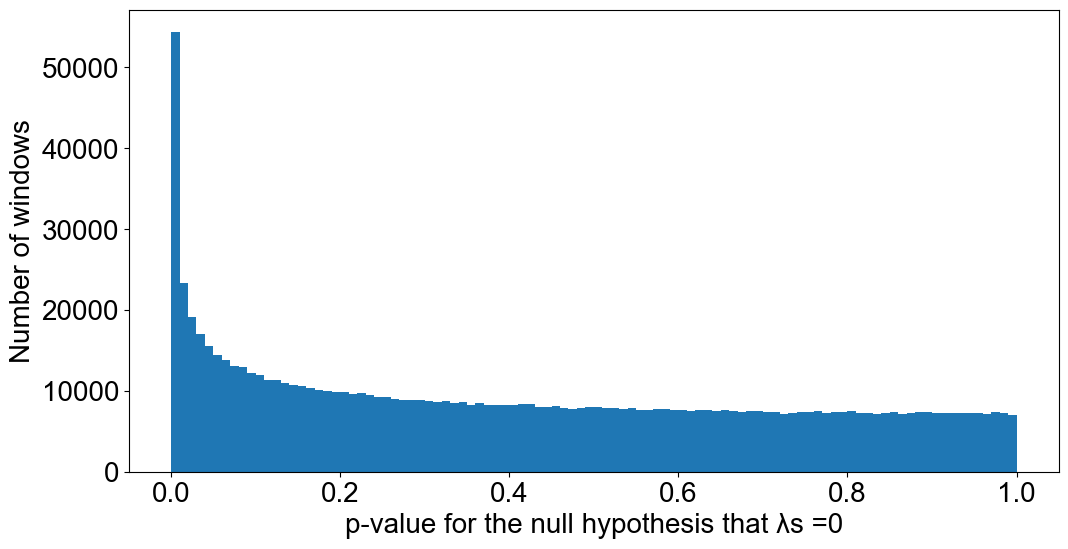

In [8]:
plt.hist(CHEN_WINDOWS_WITH_LAMBDA_S['p'], bins=100) 
# http://compgen.cshl.edu/extrainsight/description.php
plt.xlabel('p-value for the null hypothesis that λs =0')
plt.ylabel('Number of windows')

## Non-exonic Halldorsson windows, with Depletion Rank score, and various features (e.g. GC content), and enhancer-overlap status 

In [9]:
def get_halldorsson_windows(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/depletion_rank_scores/41586_2022_4965_MOESM3_ESM.noncoding.enhancer.BGS.gBGC.GC_content.bed', 
        separator='\t'
    )
    df = df.with_columns((1-pl.col('depletion_rank')).alias('depletion_rank_constraint_score_complement'))
    df = df.to_pandas()
    return df

HALLDORSSON_WINDOWS = get_halldorsson_windows()
HALLDORSSON_WINDOWS

,chromosome,start,end,depletion_rank,enhancer_overlap,window overlaps enhancer,B,B_M1star.EUR,GC_content_1000bp,GC_content_10000bp,GC_content_100000bp,depletion_rank_constraint_score_complement
0,chr1,1382950,1383450,0.637265,500.0,True,0.653,0.108103,0.507492,0.549345,0.580424,0.362735
1,chr1,1383000,1383500,0.696719,500.0,True,0.653,0.108103,0.510490,0.548945,0.580354,0.303281
2,chr1,1383050,1383550,0.856514,500.0,True,0.653,0.108103,0.508492,0.550245,0.580274,0.143486
3,chr1,1383100,1383600,0.848593,499.0,True,0.653,0.108103,0.518481,0.549245,0.580314,0.151407
4,chr1,1383150,1383650,0.940270,449.0,True,0.653,0.108103,0.512488,0.549545,0.580284,0.059730
...,...,...,...,...,...,...,...,...,...,...,...,...
38632861,chr9,137985250,137985750,0.162180,NaN,False,0.536,0.165515,0.578422,0.518648,0.489205,0.837820
38632862,chr9,137985300,137985800,0.103548,NaN,False,0.536,0.165515,0.575425,0.519848,0.489175,0.896452
38632863,chr9,137985350,137985850,0.137103,NaN,False,0.536,0.165515,0.578422,0.520048,0.489265,0.862897
38632864,chr9,137985400,137985900,0.192227,NaN,False,0.536,0.165515,0.581419,0.520548,0.489265,0.807773


In [10]:
HALLDORSSON_WINDOWS['window overlaps enhancer'].value_counts()

window overlaps enhancer
False    30421618
True      8211248
Name: count, dtype: int64

## Depletion Rank scores are very high in GC-rich regions

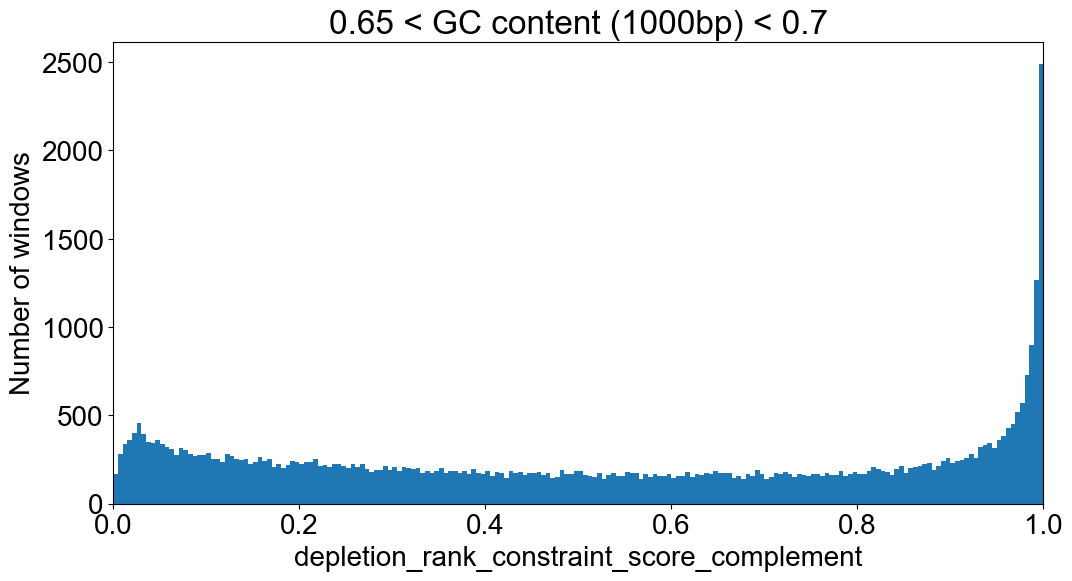

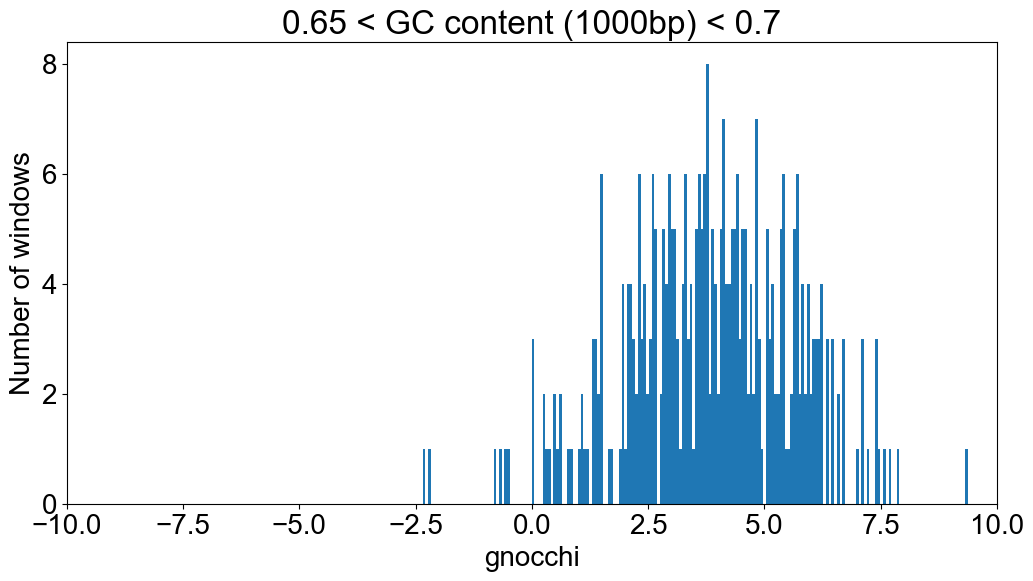

In [11]:
def plot_constraint_score_distribution(df, constraint_score, gc_windows_size, GC_content_lower, GC_content_upper, xlim):
    df = df[
        (df[f'GC_content_{gc_windows_size}bp'] > GC_content_lower) & 
        (df[f'GC_content_{gc_windows_size}bp'] < GC_content_upper)
    ]
    plt.hist(df[constraint_score], bins=200)
    plt.xlabel(constraint_score)
    plt.ylabel('Number of windows')
    plt.title(f'{GC_content_lower} < GC content ({gc_windows_size}bp) < {GC_content_upper}')
    plt.grid(False)
    plt.xlim(xlim)
    plt.show()

def plot_all_constraint_score_distributions(GC_content_lower, GC_content_upper):
    plot_constraint_score_distribution(
        HALLDORSSON_WINDOWS, 
        constraint_score='depletion_rank_constraint_score_complement', 
        gc_windows_size=1000, 
        GC_content_lower=GC_content_lower, 
        GC_content_upper=GC_content_upper,
        xlim=(0, 1)
    )
    plot_constraint_score_distribution(
        CHEN_WINDOWS, 
        constraint_score='gnocchi', 
        gc_windows_size=1000, 
        GC_content_lower=GC_content_lower, 
        GC_content_upper=GC_content_upper,
        xlim=(-10, 10)
    )

plot_all_constraint_score_distributions(0.65, 0.7)

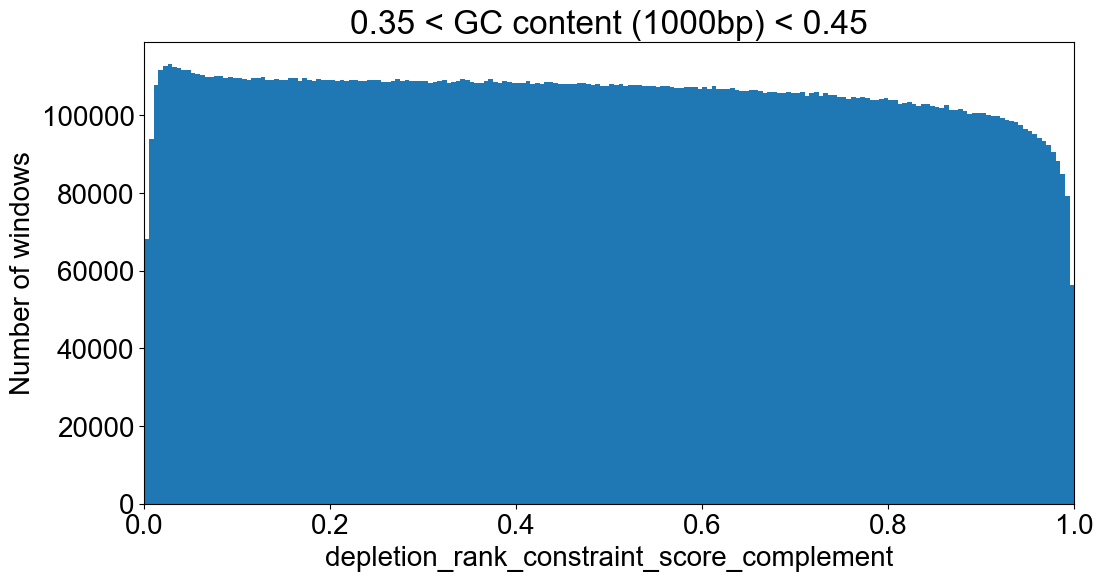

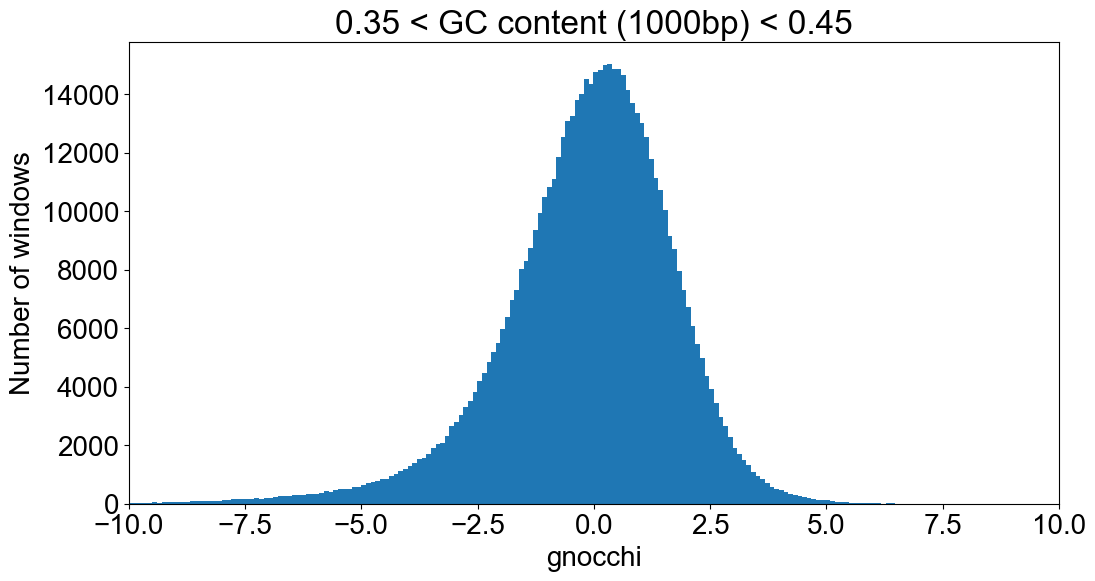

In [12]:
plot_all_constraint_score_distributions(0.35, 0.45)

## Non-exonic CDTS windows, with CDTS score, and various features (e.g. GC content), and enhancer-overlap status 

In [13]:
def get_CDTS_windows():
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/CDTS/CDTS.gnomAD.hg38.noncoding.enhancer.BGS.gBGC.GC_content.bed', 
        separator='\t'
    )
    df = df.with_columns((100-pl.col('percentile_rank_of_observed_minus_expected')).alias('percentile_rank_of_observed_minus_expected_complement'))
    df = df.to_pandas()
    return df

CDTS_WINDOWS = get_CDTS_windows()
CDTS_WINDOWS

,chromosome,start,end,observed_counts,expected_counts,observed_minus_expected,percentile_rank_of_observed_minus_expected,enhancer_overlap,window overlaps enhancer,B,B_M1star.EUR,GC_content_1000bp,percentile_rank_of_observed_minus_expected_complement
0,chr1,1382859,1383410,10,12.150556,-2.150560,30.844058,551.0,True,0.653,0.108103,0.499501,69.155942
1,chr1,1382869,1383420,10,12.163989,-2.163990,30.708951,551.0,True,0.653,0.108103,0.498502,69.291049
2,chr1,1382879,1383430,10,12.142615,-2.142610,30.923845,551.0,True,0.653,0.108103,0.502497,69.076155
3,chr1,1382889,1383440,9,12.162707,-3.162710,21.385560,551.0,True,0.653,0.108103,0.504496,78.614440
4,chr1,1382899,1383450,9,11.994043,-2.994040,22.854700,551.0,True,0.653,0.108103,0.504496,77.145300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193455898,chr17,58762584,58763135,16,16.767538,-0.767538,45.423107,NaN,False,0.536,0.226818,0.421578,54.576893
193455899,chr17,58762594,58763145,16,16.734729,-0.734729,45.776368,NaN,False,0.536,0.226818,0.420579,54.223632
193455900,chr17,58762604,58763155,16,16.730413,-0.730413,45.822940,NaN,False,0.536,0.226818,0.417582,54.177060
193455901,chr17,58762614,58763165,16,16.701082,-0.701082,46.137652,NaN,False,0.536,0.226818,0.414585,53.862348


Text(0, 0.5, 'Number of windows')

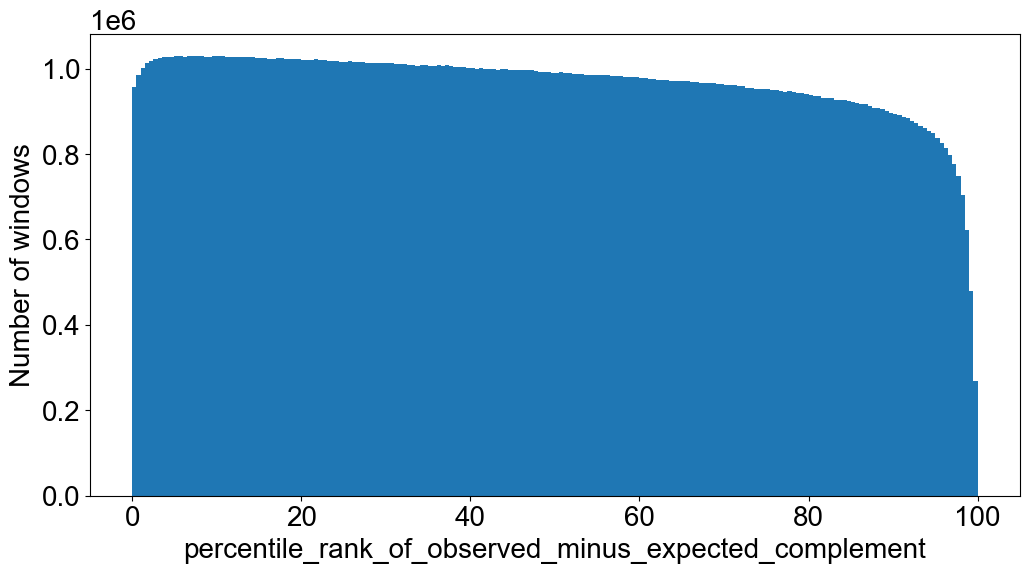

In [14]:
_ = plt.hist(CDTS_WINDOWS['percentile_rank_of_observed_minus_expected_complement'], bins=200)
plt.xlabel('percentile_rank_of_observed_minus_expected_complement')
plt.ylabel('Number of windows')

## Baseline classifier

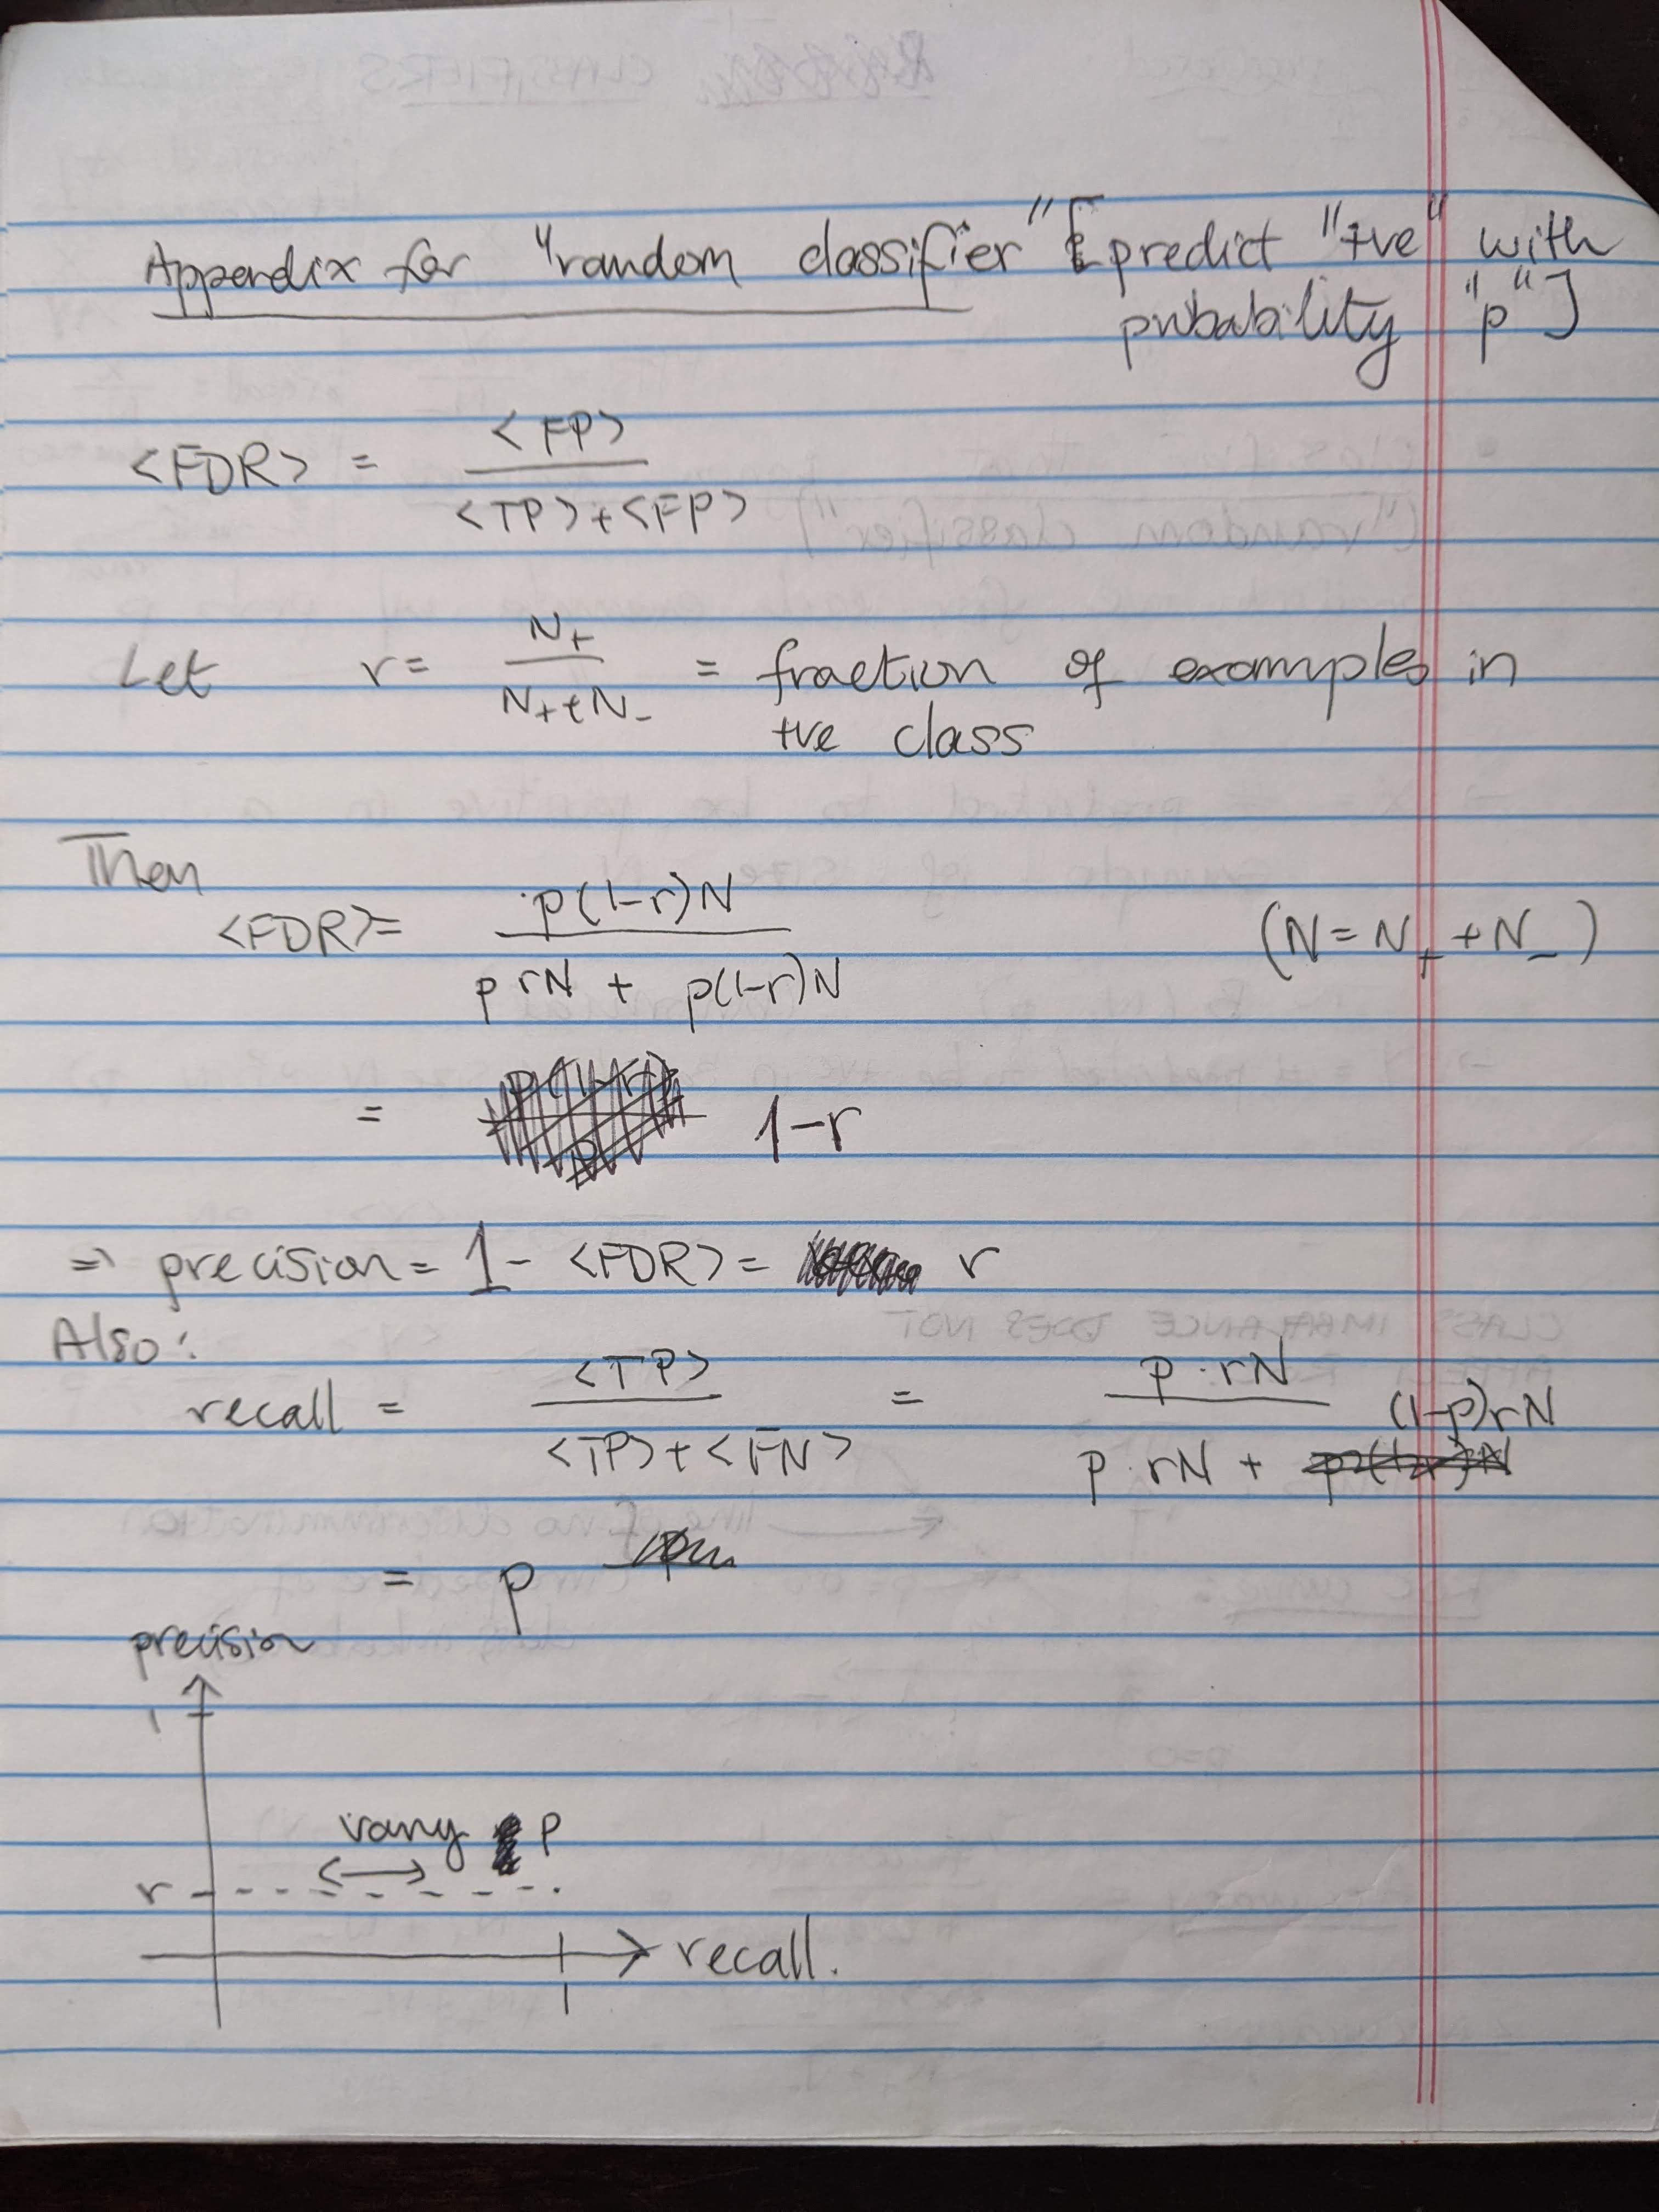

In [15]:
from IPython.display import Image # type: ignore
Image(filename='../precision_recall_random_classifier.jpg', width=600)

## Features that negatively impact a constraint-score-based classifier

In [16]:
import matplotlib.cm as cm
import importlib
import numpy as np

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import util
importlib.reload(util)
from util import (
  length_to_string, 
  compute_limits as _compute_limits, 
  slice_feature_space,
)

In [17]:
import pandas as pd

def downsample(df, group_columns, target):
  positive_class_sizes = df.groupby(group_columns, observed=False)[target].apply(lambda ser: ser.value_counts().get(True, 0))
  negative_class_sizes = df.groupby(group_columns, observed=False)[target].apply(lambda ser: ser.value_counts().get(False, 0))  
  positive_to_negative_ratios = positive_class_sizes/negative_class_sizes
  min_positive_to_negative_ratio = positive_to_negative_ratios.min()

  def downsample_positive_class(group):
    negative_class = group[group[target] == False]
    negative_class_size = len(negative_class)
    positive_class = group[group[target] == True]
    new_positive_class_size = int(min_positive_to_negative_ratio*negative_class_size)
    positive_class_downsampled = positive_class.sample(new_positive_class_size)
    return pd.concat([positive_class_downsampled, negative_class])
  
  df_downsampled = df.groupby(group_columns, observed=False).apply(downsample_positive_class).reset_index(drop=True)
  return df_downsampled

def preprocess(df, feature, target, number_bins=None, bins=None): 
    df = df.copy() 

    if number_bins is None and bins is None: 
        raise ValueError('must provide only one of number_bins and bins')    
    if number_bins is not None: 
        df[f'{feature}_bin'] = pd.cut(df[f'{feature}'], bins=number_bins)
    elif bins is not None: 
        # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
        df[f'{feature}_bin'] = pd.cut(df[f'{feature}'], bins) 
    else: 
        raise ValueError('must provide either bins or number_bins')

    df = downsample(
        df, 
        group_columns=[f'{feature}_bin'], 
        target=target
    )
    return df

def get_GC_mean_factor(gc_window_size): 
  if gc_window_size == 1000: 
    return 1
  elif gc_window_size == 1000000:
    return 0.975
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')
                     
def get_GC_std_factor(gc_window_size): 
  if gc_window_size == 1000: 
    return 0.3
  elif gc_window_size == 1000000:
    return 0.3
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')
  
def compute_center_limits(df, feature, mean_factor, std_factor):
  return _compute_limits(df, feature, mean_factor, std_factor)

def compute_GC_tail_limits(gc_window_size):
  if gc_window_size == 1000: 
    return 0.5, 1.0
  elif gc_window_size == 1000000:
    return 0.440, 1.0
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')

def get_GC_feature_lims_label(df, gc_window_size): 
  return ( 
    f'GC_content_{gc_window_size}bp', 
    compute_center_limits(
      df, 
      f'GC_content_{gc_window_size}bp', 
      mean_factor=get_GC_mean_factor(gc_window_size), 
      std_factor=get_GC_std_factor(gc_window_size)
    ), 
    compute_GC_tail_limits(gc_window_size),
    f'GC_content ({length_to_string(gc_window_size)})'
  )

def get_features_and_lims_and_labels(df, gc_window_size, log=False): 
  features_and_lims_and_labels = [
    get_GC_feature_lims_label(df, gc_window_size),
    (
      'B_M1star.EUR', 
      compute_center_limits(
        df, 
        'B_M1star.EUR', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      (0.75, 1.5),
      'gBGC'
    ),
    (
      'B', 
      compute_center_limits(
        df, 
        'B', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      (0.5, 0.55),
      'BGS'
    ),
  ]

  if log: 
    for f, cl, _, _ in features_and_lims_and_labels: 
      print(f'{f}: {cl}')

  return features_and_lims_and_labels 

In [18]:
# this is "r" in the baseline-classifier theory: 
def compute_positive_fraction(df, target):
  value_counts = df[target].value_counts()
  number_negative_examples = value_counts.get(False, 0)
  number_positive_examples = value_counts.get(True, 0)
  return number_positive_examples / (number_negative_examples + number_positive_examples)

/tmp/ipykernel_2763102/3502449354.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_downsampled = df.groupby(group_columns, observed=False).apply(downsample_positive_class).reset_index(drop=True)


(0.2, 0.3]: 21450
(0.3, 0.4]: 425433
(0.4, 0.5]: 274311
(0.5, 0.55]: 27151
(0.55, 0.6]: 6327
Gnocchi



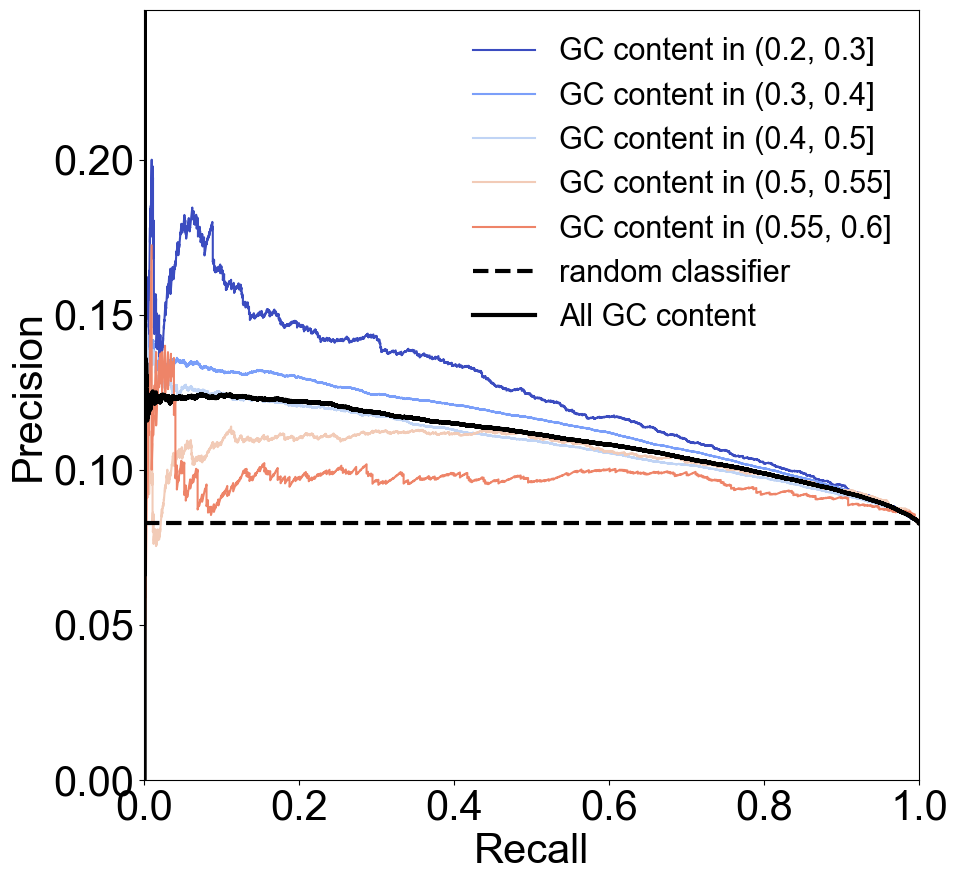

/tmp/ipykernel_2763102/3502449354.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_downsampled = df.groupby(group_columns, observed=False).apply(downsample_positive_class).reset_index(drop=True)


(0.2, 0.3]: 1710196
(0.3, 0.4]: 17215157
(0.4, 0.5]: 10964311
(0.5, 0.55]: 1224125
(0.55, 0.6]: 358614
(0.6, 0.65]: 103799
(0.65, 0.7]: 12299
Depletion Rank



/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


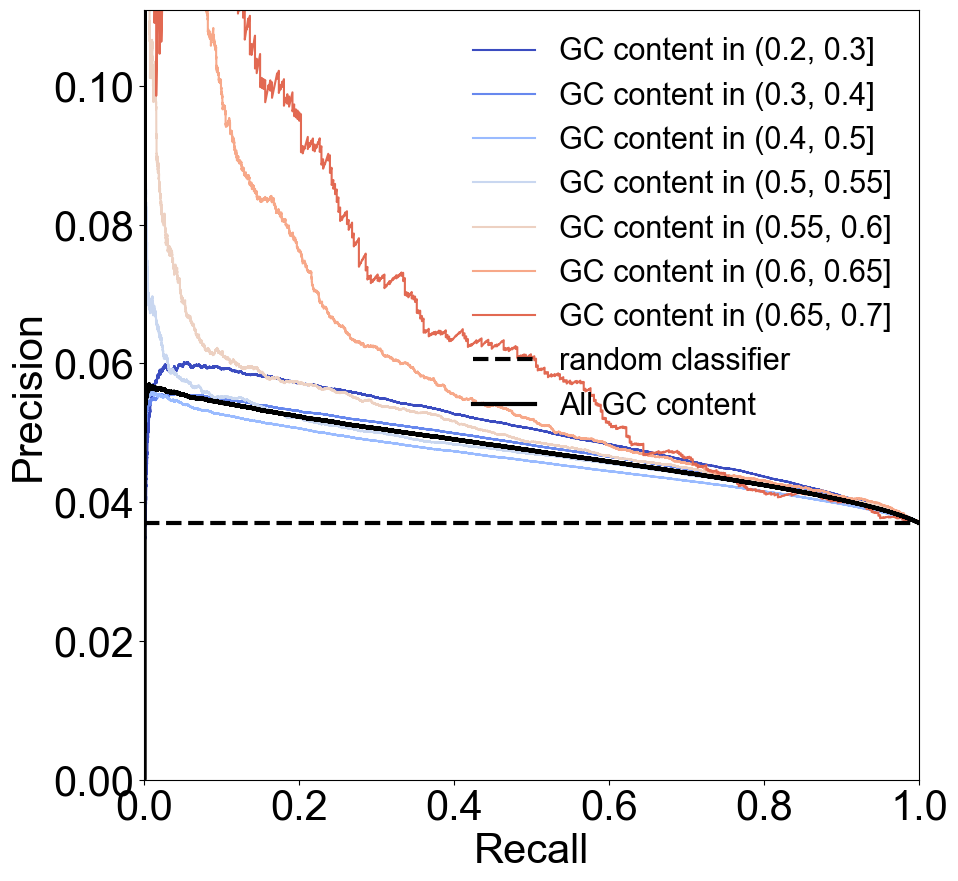

/tmp/ipykernel_2763102/3502449354.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_downsampled = df.groupby(group_columns, observed=False).apply(downsample_positive_class).reset_index(drop=True)


(0.2, 0.3]: 8328486
(0.3, 0.4]: 85058549
(0.4, 0.5]: 55236870
(0.5, 0.55]: 6192864
(0.55, 0.6]: 1770875
(0.6, 0.65]: 516767
(0.65, 0.7]: 66670
CDTS



/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


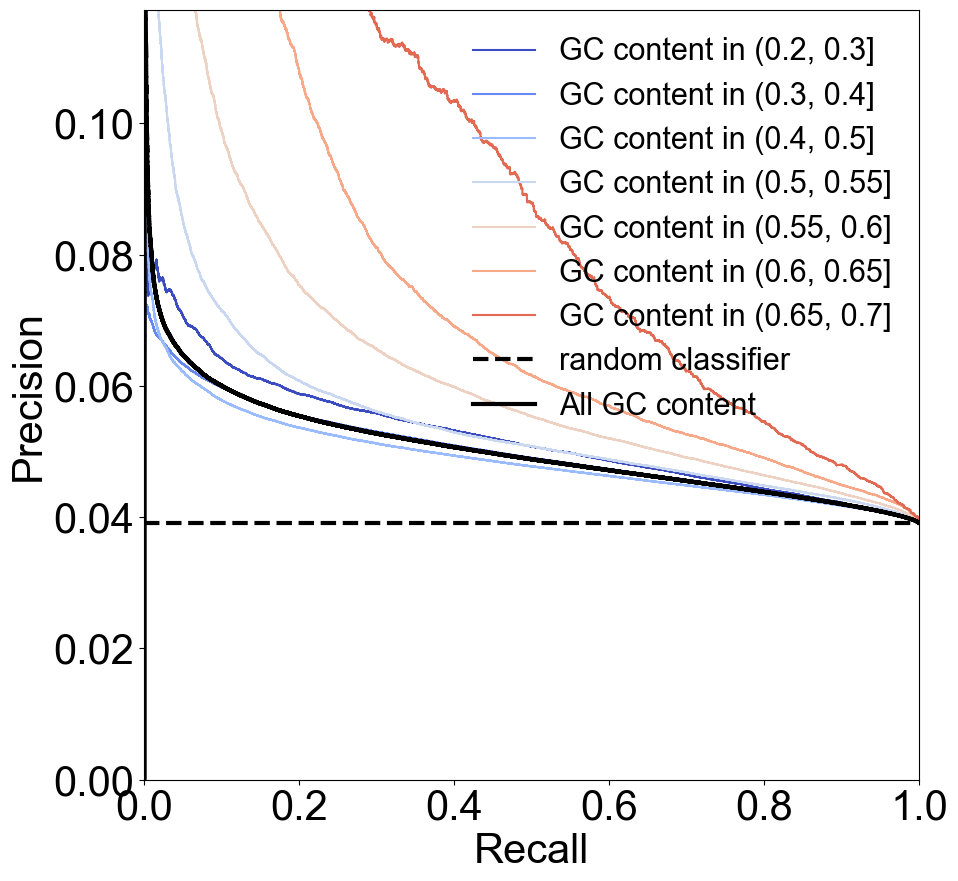

/tmp/ipykernel_2763102/3502449354.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_downsampled = df.groupby(group_columns, observed=False).apply(downsample_positive_class).reset_index(drop=True)


(0.2, 0.3]: 20530
(0.3, 0.4]: 401673
(0.4, 0.5]: 251374
(0.5, 0.55]: 24445
(0.55, 0.6]: 5713
lambda_s



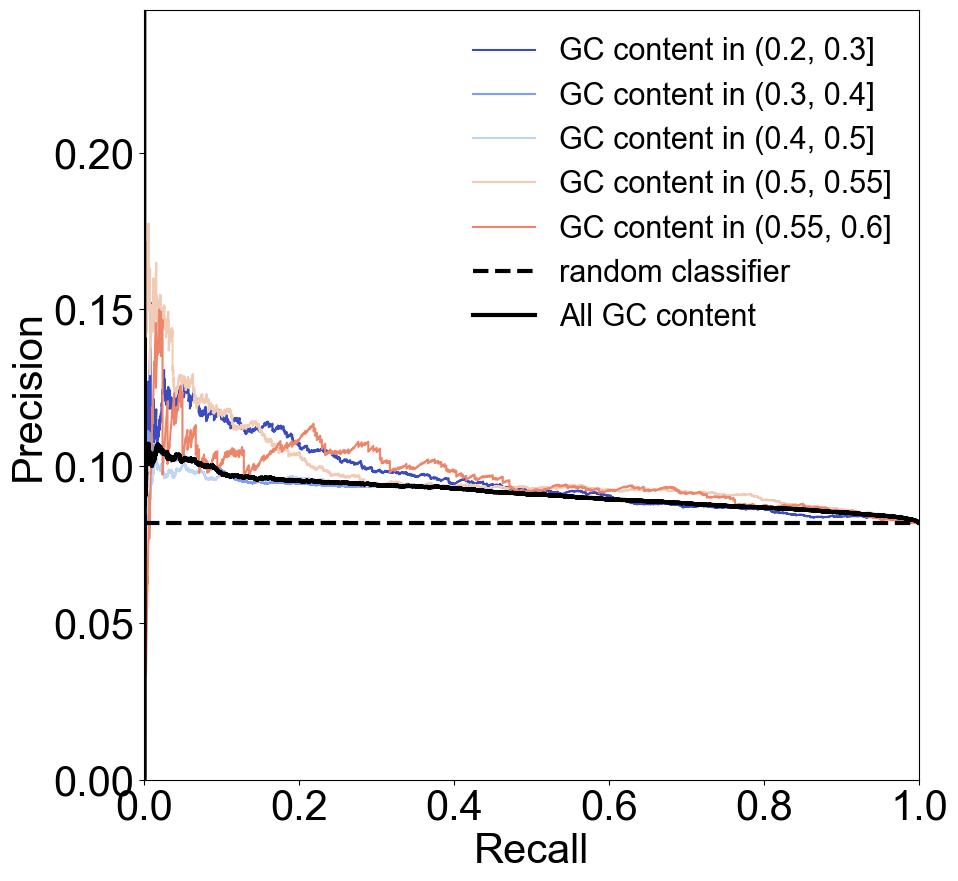

not conditioned on complementary features


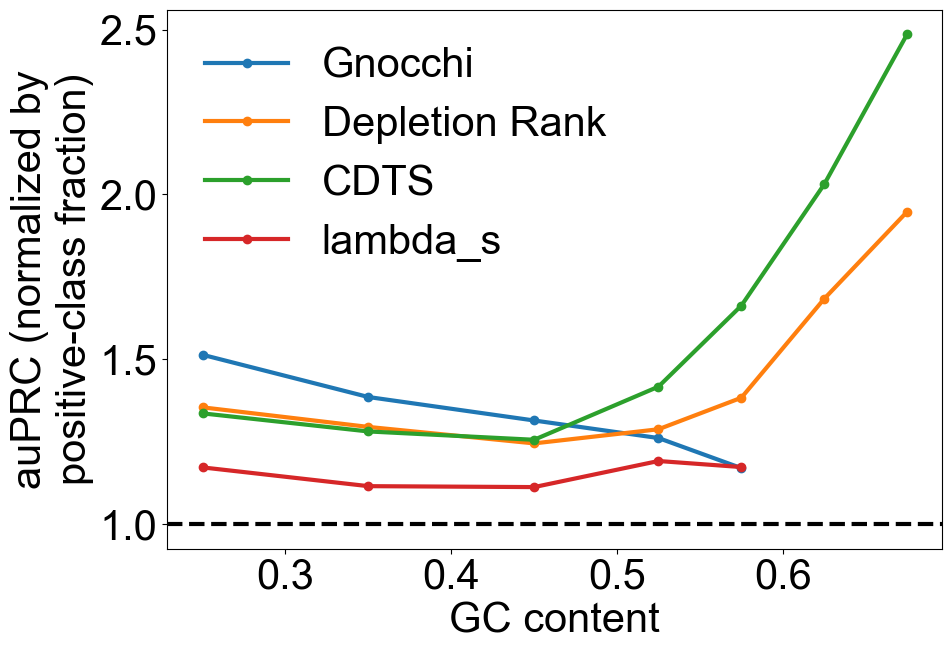

In [47]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def plot_random_classifier(df, target, type_, color, ax):
    r = compute_positive_fraction(df, target)
    if type_ == 'precision': 
        ys = [r, r] 
    elif type_ == 'FDR':
        ys = [1-r, 1-r]
    else: 
        raise ValueError(f'invalid type: {type_}')
    ax.plot([0, 1], ys, linestyle='--', linewidth=3, color=color, label='random classifier') 
  
def plot_pr_curve_single_bin(ax, type_, precision, recall, feature, feature_alias, feature_bin, color):
    FDR = 1 - precision

    if type_ == 'precision': 
        ys = precision
    elif type_ == 'FDR':
        ys = FDR
    else:
        raise ValueError(f'invalid type: {type_}')
    
    ax.plot(recall, ys, color=color, linestyle='-', label=f'{feature_alias} in {feature_bin}') 

def plot_roc_curve_single_bin(ax, fpr, tpr, color, feature, feature_bin):
    ax.plot(fpr, tpr, color=color, linestyle='-', label=f'{feature} in {feature_bin}')

def finish_pr_curve(ax, type_, constraint_score_alias, r, ylim_scale): 
    ax.grid(False)
    ax.legend(fontsize=22, frameon=False)
    ax.set_xlabel('Recall')
    if type_ == 'precision':
        ylabel = 'Precision'
    elif type_ == 'FDR':
        ylabel = 'FDR'
    else:
        raise ValueError(f'invalid type: {type_}')
    ax.set_ylabel(ylabel) 
    ax.set_xlim(0, 1)
    if type_ == 'precision':
        ylim = (0, ylim_scale*r)
    elif type_ == 'FDR':
        ylim = (0, ylim_scale*(1-r))
    else: 
        raise ValueError(f'invalid type: {type_}')
    ax.set_ylim(ylim) # type: ignore
    print(
        f'{constraint_score_alias}\n'
    )

def finish_roc_curve(ax, constraint_score_alias):
    ax.grid(False)
    ax.legend()
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR') 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(
        f'{constraint_score_alias}\n'
    )

def plot_curves_all_bins(df, type_, feature, feature_alias, number_bins, bins, constraint_score, constraint_score_alias, target, ylim_scale, sliced): 
    # plot_feature_distribution(df, feature, xlabel=feature, density=False)
    
    df = preprocess(df, feature, target, number_bins, bins)

    plt.rcParams.update({'font.size': 30})
    _, ax_pr = plt.subplots(figsize=(10, 10))
    # _, ax_roc = plt.subplots(figsize=(10, 10))

    cmap = plt.get_cmap('coolwarm') # 'Blues', 'Greys', 'inferno'

    list_of_dicts = []

    if number_bins is None and bins is None: 
        raise ValueError('must provide only one of number_bins and bins')    

    if number_bins is not None: 
        bins = df[f'{feature}_bin'].unique()
    elif bins is not None: 
        number_bins = len(bins)
    else: 
        raise ValueError('must provide either bins or number_bins')

    # First, collect bins that pass the size threshold
    valid_bins = []
    for feature_bin in sorted(bins):
        df_bin = df[df[f'{feature}_bin'] == feature_bin]
        if len(df_bin) >= 4000:
            valid_bins.append(feature_bin)

    for i, feature_bin in enumerate(valid_bins):
        df_bin = df[df[f'{feature}_bin'] == feature_bin]
        print(f'{feature_bin}: {len(df_bin)}')
        color = cmap(i / len(valid_bins))
        targets, scores = df_bin[target], df_bin[constraint_score]        
        precision, recall, _ = precision_recall_curve(targets, scores)
        fpr, tpr, _ = roc_curve(targets, scores)
        list_of_dicts.append({
            'constraint_score': constraint_score_alias,
            'conditioned_on_complementary_features': sliced,
            'feature_to_stratify_by': feature,
            'feature_bin': feature_bin,
            'area': auc(recall, precision),
            'area_type': 'PRC',
            'area_color': color,
        })
        list_of_dicts.append({
            'constraint_score': constraint_score_alias,
            'conditioned_on_complementary_features': sliced,
            'feature_to_stratify_by': feature,
            'feature_bin': feature_bin,
            'area': auc(fpr, tpr),
            'area_type': 'ROC',
            'area_color': color,
        })
        list_of_dicts.append({
            'constraint_score': constraint_score_alias,
            'conditioned_on_complementary_features': sliced,
            'feature_to_stratify_by': feature,
            'feature_bin': feature_bin,
            'area': auc(recall, precision)/compute_positive_fraction(df_bin, target),
            'area_type': 'PRCnorm',
            'area_color': color,
        })
        plot_pr_curve_single_bin(ax_pr, type_, precision, recall, feature, feature_alias, feature_bin, color)
        # plot_roc_curve_single_bin(ax_roc, fpr, tpr, color, feature, feature_bin)

    plot_random_classifier(
        df, 
        target, 
        type_=type_,
        color='black', 
        ax=ax_pr,
    )
    # ax_roc.plot([0, 1], [0, 1], linewidth=3, linestyle='--', color='black')

    # without breaking down by feature
    targets, scores = df[target], df[constraint_score]
    precision, recall, _ = precision_recall_curve(targets, scores)
    FDR = 1 - precision
    fpr, tpr, _ = roc_curve(targets, scores)

    list_of_dicts.append({
        'constraint_score': constraint_score_alias,
        'conditioned_on_complementary_features': sliced,
        'feature_to_stratify_by': feature,
        'feature_bin': 'all',
        'area': auc(recall, precision),
        'area_type': 'PRC',
        'area_color': 'green',
    })
    list_of_dicts.append({
        'constraint_score': constraint_score_alias,
        'conditioned_on_complementary_features': sliced,
        'feature_to_stratify_by': feature,
        'feature_bin': 'all',
        'area': auc(fpr, tpr),
        'area_type': 'ROC',
        'area_color': 'green',
    })
    list_of_dicts.append({
        'constraint_score': constraint_score_alias,
        'conditioned_on_complementary_features': sliced,
        'feature_to_stratify_by': feature,
        'feature_bin': 'all',
        'area': auc(recall, precision)/compute_positive_fraction(df, target),
        'area_type': 'PRCnorm',
        'area_color': 'green',
    })

    if type_ == 'precision': 
        ys = precision
    elif type_ == 'FDR':
        ys = FDR
    else:
        raise ValueError(f'invalid type: {type_}')
    ax_pr.plot(recall, ys, color='black', linewidth=3, linestyle='-', label=f'All {feature_alias}') 

    finish_pr_curve(ax_pr, type_, constraint_score_alias, compute_positive_fraction(df, target), ylim_scale)
    # finish_roc_curve(ax_roc, constraint_score_alias)

    plt.show()

    return list_of_dicts

def plot_curves_with_and_without_slicing(
    df, 
    gc_window_size, 
    feature,
    feature_alias,
    number_bins, 
    bins,
    constraint_score, 
    constraint_score_alias,
    ylim_scale,
    target, 
    type_='precision',
): 
    assert feature in [f for f, _, _, _ in get_features_and_lims_and_labels(df, gc_window_size)]

    list_of_dicts = []
    list_of_dicts.extend(plot_curves_all_bins(df, type_, feature, feature_alias, number_bins, bins, constraint_score, constraint_score_alias, target, ylim_scale, sliced=False))

    # conditional_features_and_center_lims = [
    #     (f, cl) for f, cl, _, _ in get_features_and_lims_and_labels(df, gc_window_size) if f != feature
    # ]
    # df_sliced = slice_feature_space(df, conditional_features_and_center_lims)
    # list_of_dicts.extend(plot_curves_all_bins(df_sliced, type_, feature, feature_alias, number_bins, bins, constraint_score, constraint_score_alias, target, ylim_scale, sliced=True))

    return list_of_dicts

def swarm_plot(areas, feature):
    for conditioned_on_complementary_features in [False, True]:
        for area_type in ['PRCnorm', 'ROC']:
            data = areas[
                (areas['conditioned_on_complementary_features'] == conditioned_on_complementary_features) &
                (areas['area_type'] == area_type)
            ]

            records = data[data['feature_bin'] != 'all']
            constraint_score_order = records['constraint_score'].unique()
            # https://seaborn.pydata.org/examples/scatterplot_categorical.html 
            ax = sns.swarmplot(
                data=records, 
                x="area", 
                y="constraint_score", 
                hue="feature_bin", 
                palette=records["area_color"], 
                size=20,
                order=constraint_score_order,
                edgecolor='black',
                linewidth=1,
            )
            if area_type == 'PRCnorm':
                plt.axvline(x=1, color='black', linestyle='--', linewidth=3)
                ax.set_xlabel('auPRC (normalized by positive-class fraction)')
            elif area_type == 'ROC':
                plt.axvline(x=0.5, color='black', linestyle='--', linewidth=3)
                ax.set_xlabel('auROC')
            else: 
                raise ValueError(f'invalid area type: {area_type}')
            if conditioned_on_complementary_features:
                ax.set_title('conditioned on complementary features')
            else: 
                ax.set_title('not conditioned on complementary features')
            ax.set(ylabel="")
            facecolor = 0.75
            ax.set_facecolor((facecolor, facecolor, facecolor))  # Set the background color of the axis to a lighter shade of grey

            records = data[data['feature_bin'] == 'all']
            collections = ax.collections
            for collection, constraint_score in zip(collections, constraint_score_order):
                record = records[records['constraint_score'] == constraint_score]
                assert len(record) == 1 
                x = record['area'].values[0]

                y_values = collection.get_offsets()[:, 1]
                ymin = np.mean(y_values) - 0.25
                ymax = np.mean(y_values) + 0.25

                plt.vlines(x=x, ymin=ymin, ymax=ymax, color='black', linestyle='-', linewidth=3)

            plt.legend(title=feature)
            plt.show()

def compute_midpoints_and_enhancer_fraction(df, number_bins, bins, feature, target): 
    df = df.copy() 
    if number_bins is None and bins is None: 
        raise ValueError('must provide only one of number_bins and bins')    
    if number_bins is not None: 
        df[f'{feature}_bin'] = pd.cut(df[f'{feature}'], bins=number_bins)
    elif bins is not None: 
        # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
        df[f'{feature}_bin'] = pd.cut(df[f'{feature}'], bins) 
    else: 
        raise ValueError('must provide either bins or number_bins')
    enhancer_fraction = df.groupby(f'{feature}_bin', observed=False)[target].mean()
    bins = enhancer_fraction.index
    bins_series = pd.Series(bins)
    midpoints = bins_series.apply(lambda x: x.mid)
    return midpoints, enhancer_fraction

def compute_midpoints_and_enhancer_fraction_wrapper(conditioned_on_complementary_features, df, number_bins, bins, feature, target, gc_window_size): 
    if conditioned_on_complementary_features: 
        conditional_features_and_center_lims = [
            (f, cl) for f, cl, _, _ in get_features_and_lims_and_labels(df, gc_window_size) if f != feature
        ]
        df_sliced = slice_feature_space(df, conditional_features_and_center_lims)
        return compute_midpoints_and_enhancer_fraction(df_sliced, number_bins, bins, feature, target)    
    else: 
        return compute_midpoints_and_enhancer_fraction(df, number_bins, bins, feature, target)    

def line_plot(areas, windows, number_bins, bins, feature, feature_alias, target, gc_window_size):
    # conditioned_on_complementary_features_values = [False, True]
    conditioned_on_complementary_features_values = [False]
    
    # x2_y2 = {}
    # for conditioned_on_complementary_features in conditioned_on_complementary_features_values:
    #     x2_y2[conditioned_on_complementary_features] = compute_midpoints_and_enhancer_fraction_wrapper(
    #         conditioned_on_complementary_features=conditioned_on_complementary_features, 
    #         df=windows, 
    #         number_bins=number_bins, 
    #         bins=bins, 
    #         feature=feature, 
    #         target=target, 
    #         gc_window_size=gc_window_size
    #     )

    areas = areas[areas['feature_bin'] != 'all']
    for conditioned_on_complementary_features in conditioned_on_complementary_features_values:
        for area_type in ['PRCnorm']: # ['PRCnorm', 'ROC']:
            areas_ = areas[
                (areas['conditioned_on_complementary_features'] == conditioned_on_complementary_features) &
                (areas['area_type'] == area_type)
            ]

            # fig, axs = plt.subplots(2, 1, figsize=(10, 15), sharex=True)
            # fig.subplots_adjust(hspace=0.1)
            fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharex=True)

            # ax0 = axs[0]
            # ax1 = axs[1]
            ax0 = axs

            constraint_scores = areas_['constraint_score'].unique()
            for constraint_score in constraint_scores:
                areas__ = areas_[areas_['constraint_score'] == constraint_score]
                x1 = areas__['feature_bin'].apply(lambda x: x.mid).astype(float)
                y1 = areas__['area']
                ax0.plot(x1, y1, 'o-', label=constraint_score, linewidth=3)

            # x2, y2 = x2_y2[conditioned_on_complementary_features]
            # ax1.plot(x2, y2, 'o-', linewidth=3)

            if area_type == 'PRCnorm':
                ax0.axhline(y=1, color='black', linestyle='--', linewidth=3)
                ax0.set_ylabel('auPRC (normalized by\npositive-class fraction)')
            elif area_type == 'ROC':
                ax0.axhline(y=0.5, color='black', linestyle='--', linewidth=3)
                ax0.set_ylabel('auROC')
            else: 
                raise ValueError(f'invalid area type: {area_type}')
            if conditioned_on_complementary_features:
                print('conditioned on complementary features')
            else: 
                print('not conditioned on complementary features')
            # ax0.legend(title='constraint score')
            ax0.legend(frameon=False)
            ax0.set_xlabel(feature_alias)

            # ax1.set_ylabel('Fraction of windows\nthat overlap enhancers')
            # ax1.set_ylim(0, 1)
            # ax1.set_xlabel(feature)

            plt.show()

def plot_area_under_curve_wrapper(gc_window_size, feature, feature_alias, ylim_scale, number_bins=None, bins=None, target='window overlaps enhancer'): 
    list_of_dicts = []

    list_of_dicts.extend(plot_curves_with_and_without_slicing(
        CHEN_WINDOWS,
        gc_window_size, 
        feature, 
        feature_alias,
        number_bins, 
        bins,
        constraint_score='gnocchi', 
        constraint_score_alias='Gnocchi',
        ylim_scale=ylim_scale,
        target=target, 
    ))

    list_of_dicts.extend(plot_curves_with_and_without_slicing(
        HALLDORSSON_WINDOWS, 
        gc_window_size, 
        feature, 
        feature_alias,
        number_bins, 
        bins,
        constraint_score='depletion_rank_constraint_score_complement',
        constraint_score_alias='Depletion Rank',
        ylim_scale=ylim_scale,
        target=target, 
    ))

    list_of_dicts.extend(plot_curves_with_and_without_slicing(
        CDTS_WINDOWS, 
        gc_window_size, 
        feature, 
        feature_alias,
        number_bins, 
        bins,
        constraint_score='percentile_rank_of_observed_minus_expected_complement',
        constraint_score_alias='CDTS',
        ylim_scale=ylim_scale,
        target=target, 
    ))

    list_of_dicts.extend(plot_curves_with_and_without_slicing(
        CHEN_WINDOWS_WITH_LAMBDA_S, 
        gc_window_size, 
        feature, 
        feature_alias,
        number_bins, 
        bins,
        constraint_score='strong_selection',
        constraint_score_alias='lambda_s',
        ylim_scale=ylim_scale,
        target=target, 
    ))

    areas = pd.DataFrame(list_of_dicts)

    # swarm_plot(areas, feature)
    line_plot( 
        areas, 
        HALLDORSSON_WINDOWS,
        number_bins, 
        bins, 
        feature, 
        feature_alias,
        target,
        gc_window_size
    )

plot_area_under_curve_wrapper(
    gc_window_size=1000,
    feature='GC_content_1000bp',
    feature_alias='GC content',
    ylim_scale=3,
    bins=pd.IntervalIndex.from_tuples([(0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.50, 0.55), (0.55, 0.60), (0.60, 0.65), (0.65, 0.70), (0.7, 0.8)]),
)

In [ ]:
# plot_area_under_curve_wrapper(
#     gc_window_size=1000,
#     feature='B',
#     feature_alias='BGS',
#     ylim_scale=2,
#     bins=pd.IntervalIndex.from_tuples([(0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 0.95), (0.95, 1.0)]),
# )

In [ ]:
# plot_area_under_curve_wrapper(
#     gc_window_size=1000,
#     feature='B_M1star.EUR',
#     feature_alias='gBGC',
#     ylim_scale=3,
#     bins=pd.IntervalIndex.from_tuples([(-0.3, 0.0), (0.0, 0.3), (0.3, 0.6), (0.6, 0.9), (0.9, 1.2), (1.2, 1.5)]),
# )